In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Raw Data
import pandas as pd
dr = pd.read_csv('deathrate.csv')
dr.head(10)

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty
0,1,1999,"Abbeville County, SC",45001,1,25921,3257.0
1,2,1999,"Acadia Parish, LA",22001,7,58762,12461.0
2,3,1999,"Accomack County, VA",51001,5,37614,6107.0
3,4,1999,"Ada County, ID",16001,7,294292,24964.0
4,5,1999,"Adair County, IA",19001,1,8298,697.0
5,6,1999,"Adair County, KY",21001,5,17054,3656.0
6,7,1999,"Adair County, MO",29001,3,24961,3284.0
7,8,1999,"Adair County, OK",40001,3,20904,4385.0
8,9,1999,"Adams County, CO",8001,9,354146,32040.0
9,10,1999,"Adams County, IA",19003,1,4498,510.0


In [16]:
# Row Counts
dr.count()

Unnamed: 0    50164
Year          50164
County        50164
FIPS          50164
Deathrate     50164
Population    50164
Poverty       50153
dtype: int64

In [32]:
# Missing Values
dr.isnull().sum()

Unnamed: 0     0
Year           0
County         0
FIPS           0
Deathrate      0
Population     0
Poverty       11
dtype: int64

In [60]:
# Missing Values
dr[dr.isnull().any(axis=1)]

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty
1839,1840,1999,"Mc Kean County, PA",42083,5,46287,NaN
17138,17139,2004,"Kalawao County, HI",15005,5,117,NaN
20273,20274,2005,"Kalawao County, HI",15005,5,114,NaN
26543,26544,2007,"Kalawao County, HI",15005,9,105,NaN
29678,29679,2008,"Kalawao County, HI",15005,9,99,NaN
32813,32814,2009,"Kalawao County, HI",15005,11,93,NaN
35948,35949,2010,"Kalawao County, HI",15005,13,90,NaN
39083,39084,2011,"Kalawao County, HI",15005,15,90,NaN
42218,42219,2012,"Kalawao County, HI",15005,19,89,NaN
45353,45354,2013,"Kalawao County, HI",15005,20,89,NaN


In [65]:
# Missing Years
dr.groupby("Year").count()

,Unnamed: 0,County,FIPS,Deathrate,Population,Poverty
Year,,,,,,
1999,3136,3136,3136,3136,3136,3135
2000,3136,3136,3136,3136,3136,3136
2001,3136,3136,3136,3136,3136,3136
2002,3136,3136,3136,3136,3136,3136
2003,3135,3135,3135,3135,3135,3135
2004,3135,3135,3135,3135,3135,3134
2005,3135,3135,3135,3135,3135,3134
2006,3135,3135,3135,3135,3135,3135
2007,3135,3135,3135,3135,3135,3134


In [40]:
# District of Columbia, DC has duplicate rows for 1999, 2000, 2001, and 2002
dr[dr['County'] == 'District of Columbia, DC']

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty
786,787,1999,"District of Columbia, DC",11001,7,570213,95123.0
787,788,1999,"District of Columbia, DC",11001,7,570213,95123.0
3922,3923,2000,"District of Columbia, DC",11001,7,572046,91435.0
3923,3924,2000,"District of Columbia, DC",11001,7,572046,91435.0
7058,7059,2001,"District of Columbia, DC",11001,9,574504,97584.0
7059,7060,2001,"District of Columbia, DC",11001,9,574504,97584.0
10194,10195,2002,"District of Columbia, DC",11001,9,573158,95179.0
10195,10196,2002,"District of Columbia, DC",11001,9,573158,95179.0
13330,13331,2003,"District of Columbia, DC",11001,9,568502,94560.0
16465,16466,2004,"District of Columbia, DC",11001,11,567754,98309.0


In [13]:
# Average Death Rate by Year
dr.groupby('Year').mean().sort_values(['Year'], ascending=False)

,Unnamed: 0,FIPS,Deathrate,Population,Poverty
Year,,,,,
2014,48597.0,30444.805104,13.745136,101683.559490,15380.881621
2013,45462.0,30444.805104,12.925997,100931.459968,15572.313976
2012,42327.0,30444.805104,12.122807,100170.979266,15556.193044
2011,39192.0,30444.805104,11.343860,99409.011483,15457.859604
2010,36057.0,30444.805104,10.558533,98652.011483,14744.522655
2009,32922.0,30444.805104,9.792344,97829.045933,13676.606892
2008,29787.0,30444.805104,9.073046,96975.445614,12476.934588
2007,26652.0,30444.805104,8.394896,96062.786284,12139.809190
2006,23517.0,30444.805104,7.743222,95154.134928,12360.974163


In [3]:
# Extracting out state and county to two new columns
dr_state = dr.copy()
dr_state['State'] = dr_state.apply(lambda row: row['County'][-2:], axis=1)
dr_state['City'] = dr_state.apply(lambda row: row['County'].split(',')[0], axis=1)
dr_state.head()

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty,State,City
0,1,1999,"Abbeville County, SC",45001,1,25921,3257.0,SC,Abbeville County
1,2,1999,"Acadia Parish, LA",22001,7,58762,12461.0,LA,Acadia Parish
2,3,1999,"Accomack County, VA",51001,5,37614,6107.0,VA,Accomack County
3,4,1999,"Ada County, ID",16001,7,294292,24964.0,ID,Ada County
4,5,1999,"Adair County, IA",19001,1,8298,697.0,IA,Adair County


In [13]:
# Example search
dr_state[dr_state['FIPS'] == 53033]

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty,State,City
1501,1502,1999,"King County, WA",53033,7,1729058,130260.0,WA,King County
4637,4638,2000,"King County, WA",53033,7,1739009,124185.0,WA,King County
7773,7774,2001,"King County, WA",53033,9,1754090,129685.0,WA,King County
10909,10910,2002,"King County, WA",53033,9,1758685,144069.0,WA,King County
14044,14045,2003,"King County, WA",53033,9,1763440,165484.0,WA,King County
17179,17180,2004,"King County, WA",53033,9,1775297,176928.0,WA,King County
20314,20315,2005,"King County, WA",53033,11,1795268,167720.0,WA,King County
23449,23450,2006,"King County, WA",53033,11,1822967,172537.0,WA,King County
26584,26585,2007,"King County, WA",53033,11,1847986,180219.0,WA,King County
29719,29720,2008,"King County, WA",53033,13,1875020,169901.0,WA,King County


In [49]:
# Average death rate by state
dr_state.groupby('State').mean().sort_values(['Deathrate'], ascending=False)

,Unnamed: 0,Year,FIPS,Deathrate,Population,Poverty
State,,,,,,
NM,25226.981061,2006.5,35030.151515,14.486742,59526.571970,10932.060606
AZ,25186.875000,2006.5,4013.866667,12.983333,397849.612500,61896.216667
KY,24977.687500,2006.5,21120.000000,12.916667,35244.967708,5828.566146
WV,25296.034091,2006.5,54055.000000,12.868182,33289.069318,5601.718182
TN,25110.667105,2006.5,47095.000000,12.386842,64285.228947,9923.533553
UT,25323.693966,2006.5,49029.000000,12.228448,88526.306034,9655.209052
OK,25039.858766,2006.5,40077.000000,12.020292,47188.017045,7195.754870
NV,25055.257353,2006.5,32045.529412,11.985294,145304.433824,17853.544118
RI,25341.675000,2006.5,44005.000000,11.812500,211537.075000,25258.975000


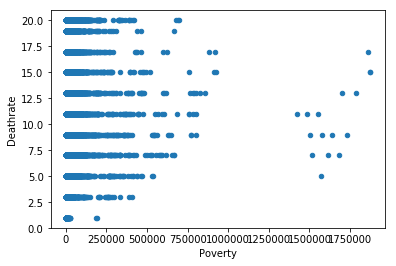

In [45]:
# Poverty vs Deathrate plot
# Note that death rate is discrete!
plot = dr.plot.scatter(x='Poverty', y='Deathrate')
plot

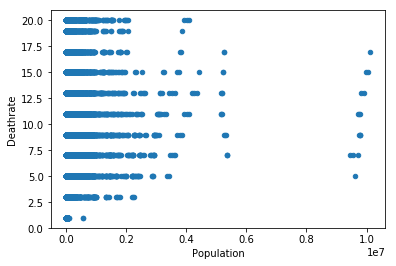

In [4]:
#Population vs Deathrate plot
plot = dr.plot.scatter(x='Population', y='Deathrate')
plot

In [20]:
# New dataset with counties and longitude/latitude
# Obatined from https://simplemaps.com/data/us-cities
cities = pd.read_csv('cities.csv')
cities.head(10)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659
5,Telma,Telma,WA,Washington,53007,Chelan,47.8432,-120.8157,NaN,NaN,1.4,point,False,America/Los_Angeles,98826,1840037825
6,Kahlotus,Kahlotus,WA,Washington,53021,Franklin,46.6436,-118.5566,189.0,189.0,156.0,polygon,True,America/Los_Angeles,99335,1840018478
7,Mondovi,Mondovi,WA,Washington,53043,Lincoln,47.6813,-118.0164,NaN,NaN,9.4,point,False,America/Los_Angeles,99122,1840037576
8,Washtucna,Washtucna,WA,Washington,53001,Adams,46.7539,-118.3104,195.0,195.0,108.0,polygon,True,America/Los_Angeles,99371,1840022312
9,Pleasant Hill,Pleasant Hill,WA,Washington,53033,King,47.6154,-121.9096,NaN,NaN,25.8,point,False,America/Los_Angeles,98014,1840037805


In [33]:
# Each county consists of many cities
# Getting the mean latitude and longitude for each county 
cities = pd.read_csv('cities.csv')
cities = cities.drop(columns=['city_ascii', 'state_name', 'population', 'population_proper', 'density', 'source', 'incorporated', 'timezone', 'zips', 'id'])
cities_mean = cities.groupby('county_fips').mean()
cities_mean.head(10)


,lat,lng
county_fips,,
1001,32.556614,-86.601586
1003,30.552217,-87.733575
1005,31.845090,-85.422270
1007,33.036590,-87.075280
1009,33.981928,-86.575689
1011,32.121575,-85.751725
1013,31.695017,-86.746867
1015,33.735147,-85.807640
1017,32.931308,-85.343600


In [34]:
# Merge latitude and longitude with county
merged = dr_state.merge(cities_mean, left_on='FIPS', right_on='county_fips', how='left')
merged.head(10)

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty,State,City,lat,lng
0,1,1999,"Abbeville County, SC",45001,1,25921,3257.0,SC,Abbeville County,34.253043,-82.500214
1,2,1999,"Acadia Parish, LA",22001,7,58762,12461.0,LA,Acadia Parish,30.260009,-92.424273
2,3,1999,"Accomack County, VA",51001,5,37614,6107.0,VA,Accomack County,37.767581,-75.665943
3,4,1999,"Ada County, ID",16001,7,294292,24964.0,ID,Ada County,43.620729,-116.327886
4,5,1999,"Adair County, IA",19001,1,8298,697.0,IA,Adair County,41.282560,-94.484860
5,6,1999,"Adair County, KY",21001,5,17054,3656.0,KY,Adair County,37.110171,-85.307586
6,7,1999,"Adair County, MO",29001,3,24961,3284.0,MO,Adair County,40.157500,-92.524700
7,8,1999,"Adair County, OK",40001,3,20904,4385.0,OK,Adair County,35.877953,-94.649721
8,9,1999,"Adams County, CO",8001,9,354146,32040.0,CO,Adams County,39.844996,-104.872170
9,10,1999,"Adams County, IA",19003,1,4498,510.0,IA,Adams County,41.044500,-94.722000


In [32]:
# Counties with no longitude/latitude data
merged.count()

Unnamed: 0    50164
Year          50164
County        50164
FIPS          50164
Deathrate     50164
Population    50164
Poverty       50153
State         50164
City          50164
lat           50116
lng           50116
dtype: int64

In [39]:
# Counties with no latitude and longitude data: (Obtained from google)
# Bristol County, RI (41.7258, -71.3112)
# Shannon County, SD (43.2437, -102.6216)
# Wade Hampton Census Area, AK (62.1458, -162.8919)
# Should we manually insert?

merged[merged.isnull().any(axis=1)].sort_values(['County', 'Year'])

,Unnamed: 0,Year,County,FIPS,Deathrate,Population,Poverty,State,City,lat,lng
274,275,1999,"Bristol County, RI",44001,5,50466,3195.0,RI,Bristol County,NaN,NaN
3410,3411,2000,"Bristol County, RI",44001,7,50697,3057.0,RI,Bristol County,NaN,NaN
6546,6547,2001,"Bristol County, RI",44001,7,50942,2956.0,RI,Bristol County,NaN,NaN
9682,9683,2002,"Bristol County, RI",44001,7,51850,3108.0,RI,Bristol County,NaN,NaN
12818,12819,2003,"Bristol County, RI",44001,7,51658,3459.0,RI,Bristol County,NaN,NaN
15953,15954,2004,"Bristol County, RI",44001,9,52213,3526.0,RI,Bristol County,NaN,NaN
19088,19089,2005,"Bristol County, RI",44001,9,51667,3117.0,RI,Bristol County,NaN,NaN
22223,22224,2006,"Bristol County, RI",44001,9,50996,3165.0,RI,Bristol County,NaN,NaN
25358,25359,2007,"Bristol County, RI",44001,9,50914,3154.0,RI,Bristol County,NaN,NaN
28493,28494,2008,"Bristol County, RI",44001,11,50668,4061.0,RI,Bristol County,NaN,NaN
